In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import unicodedata
from sklearn.metrics import mean_absolute_error, r2_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

## Scrap 

In [2]:
url = "http://www.francetvinfo.fr/elections/resultats/"
resultats = requests.get(url)
soup = BeautifulSoup(resultats.text, 'html.parser')
df = pd.DataFrame(columns=["depart", "code", "circo", "nom", "parti", "score"])
circos_url = []

index=0


for depart in soup.find("section", {"id": "departmentResults"}).findAll("a", href=True):
    url_depart = depart["href"]
    print(url_depart)
    
    soup_depart = BeautifulSoup(requests.get(url_depart).text, 'html.parser')
    depart_name = url_depart.split("/")[-2][:-3]
    depart_number = url_depart.split("_")[-1][:-1]
    i=0
    for circo in (soup_depart.findAll("section")[3].findAll("a", href=True)):
        circo_number = i
        url_circo = circo["href"]
        
        if url_circo in circos_url:
            continue
        else : 
            circos_url.append(url_circo)
            i+=1
        
        try:
            soup_circo = BeautifulSoup(requests.get(url_circo).text, 'html.parser')
        except:
            print("error at : ", url_circo)
            continue
            
        candidats = soup_circo.findAll("section")[3].findAll("div", {"class" : re.compile("^candidate")})[:-2]
        
        for candidat in candidats: 
            try:
                name = candidat.find("span", {"class": "name"}).text
                parti = candidat.find("span", {"class": "party"}).text
                score = candidat.find("span", {"class": "percent"}).text
                df.loc[index] = [depart_name, depart_number, circo_number, name, parti, score]
                index+=1
            except :
                print("error at ", depart_name, circo_number)
                continue



http://www.francetvinfo.fr/elections/resultats/ain_01/
http://www.francetvinfo.fr/elections/resultats/aisne_02/
http://www.francetvinfo.fr/elections/resultats/allier_03/
http://www.francetvinfo.fr/elections/resultats/alpes-de-haute-provence_04/
http://www.francetvinfo.fr/elections/resultats/hautes-alpes_05/
http://www.francetvinfo.fr/elections/resultats/alpes-maritimes_06/
http://www.francetvinfo.fr/elections/resultats/ardeche_07/
http://www.francetvinfo.fr/elections/resultats/ardennes_08/
http://www.francetvinfo.fr/elections/resultats/ariege_09/
http://www.francetvinfo.fr/elections/resultats/aube_10/
http://www.francetvinfo.fr/elections/resultats/aude_11/
http://www.francetvinfo.fr/elections/resultats/aveyron_12/
http://www.francetvinfo.fr/elections/resultats/bouches-du-rhone_13/
http://www.francetvinfo.fr/elections/resultats/calvados_14/
http://www.francetvinfo.fr/elections/resultats/cantal_15/
http://www.francetvinfo.fr/elections/resultats/charente_16/
http://www.francetvinfo.fr/ele

In [3]:
df.shape

(7668, 6)

In [4]:
df2 = df.copy()

In [6]:
df2.code.unique()

array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '2A', '2B', '30', '31', '32',
       '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43',
       '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76',
       '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87',
       '88', '89', '90', '91', '92', '93', '94', '95', '971', '972', '973',
       '974', '975', '976', '977', '986', '987', '988'], dtype=object)

## On récupère à la main certaines valeurs :

In [372]:
url_alamano = ["http://www.francetvinfo.fr/elections/resultats/la-reunion_974/la-reunion_1ere-circonscription",
              "http://www.francetvinfo.fr/elections/resultats/la-reunion_974/la-reunion_2eme-circonscription", 
              "http://www.francetvinfo.fr/elections/resultats/la-reunion_974/la-reunion_3eme-circonscription",
              "http://www.francetvinfo.fr/elections/resultats/la-reunion_974/la-reunion_4eme-circonscription",
              "http://www.francetvinfo.fr/elections/resultats/la-reunion_974/la-reunion_5eme-circonscription",
              "http://www.francetvinfo.fr/elections/resultats/la-reunion_974/la-reunion_6eme-circonscription",
              "http://www.francetvinfo.fr/elections/resultats/la-reunion_974/la-reunion_7eme-circonscription",
              "http://www.francetvinfo.fr/elections/resultats/guyane_973/guyane_1ere-circonscription",
              "http://www.francetvinfo.fr/elections/resultats/guyane_973/guyane_2eme-circonscription"]
for i, url in enumerate(url_alamano[-2:]):
    soup_circo = BeautifulSoup(requests.get(url).text, 'html.parser')
    for item in soup_circo.findAll("section")[3].findAll("div", {"class" : re.compile("^candidate")})[:-2]:
        name = item.find("span", {"class": "name"}).text
        parti = item.find("span", {"class": "party"}).text
        score = item.find("span", {"class": "percent"}).text
        df2.loc[df2.shape[0]+1] = ["guyane", 973, i, name, parti, score]


In [373]:
df2.shape

(7536, 6)

In [374]:
df2.head()

,depart,code,circo,nom,parti,score
0,ain,01,0.0,Laurent Mallet,Modem,"33,89 %"
1,ain,01,0.0,Xavier Breton,Les Républicains,"26,78 %"
2,ain,01,0.0,Jérôme Buisson,Front National,"15,46 %"
3,ain,01,0.0,Fabrine Martin Zemlik,La France insoumise,"9,70 %"
4,ain,01,0.0,Florence Blatrix-Contat,Parti socialiste,"9,23 %"


## On gère les nom prénom

In [7]:
df2.score = df2.score.map(lambda x : float(x.replace(",", ".").replace("%", "").strip()))
df2.nom = df2.nom.map(lambda s : unicodedata.normalize('NFD', s).encode('ascii', 'ignore').decode("utf-8") )
df2["prenom"] = df2.nom.map(lambda x : x.split(" ")[0].upper())
df2.nom = df2.nom.map(lambda x : x.split(" ")[1].upper())
df2.circo +=1

In [8]:
df2.head()

,depart,code,circo,nom,parti,score,prenom
0,ain,01,1.0,MALLET,Modem,33.89,LAURENT
1,ain,01,1.0,BRETON,Les Républicains,26.78,XAVIER
2,ain,01,1.0,BUISSON,Front National,15.46,JEROME
3,ain,01,1.0,MARTIN,La France insoumise,9.70,FABRINE
4,ain,01,1.0,BLATRIX-CONTAT,Parti socialiste,9.23,FLORENCE


## On crée un code pour chaque circo 

In [9]:
def f(x):
    try:
        a = float(x)
    except:
        a = x
    return a

In [10]:
df2.code = df2.code.map(lambda x : str(f(x))[:-2])
df2.circo = df2.circo.map(lambda x : str(x)[:-2])
df2["code_dep"] = df2.code
df2["code"] = df2[['code', 'circo']].apply(lambda x: '|'.join(x), axis=1)

## Export to csv

In [11]:
df2.to_csv("data/resultats_1ertour.csv", index=False)

In [12]:
df2.head()

,depart,code,circo,nom,parti,score,prenom,code_dep
0,ain,1|1,1,MALLET,Modem,33.89,LAURENT,1
1,ain,1|1,1,BRETON,Les Républicains,26.78,XAVIER,1
2,ain,1|1,1,BUISSON,Front National,15.46,JEROME,1
3,ain,1|1,1,MARTIN,La France insoumise,9.70,FABRINE,1
4,ain,1|1,1,BLATRIX-CONTAT,Parti socialiste,9.23,FLORENCE,1


## On récupère les pred

In [13]:
pred = pd.read_excel("data/predictions_du_7_6_15h35.xlsx")

In [14]:
pred.shape

(7699, 16)

In [15]:
pred["nom"] = pred["nom"].map(lambda x : x.split(" ")[0]) 

In [16]:
df2.merge(pred[["nom", "prenom", "code", "prediction"]], how="left", on=["nom", "prenom", "code"])

,depart,code,circo,nom,parti,score,prenom,code_dep,prediction
0,ain,1|1,1,MALLET,Modem,33.89,LAURENT,1,0.272217
1,ain,1|1,1,BRETON,Les Républicains,26.78,XAVIER,1,0.338142
2,ain,1|1,1,BUISSON,Front National,15.46,JEROME,1,0.173581
3,ain,1|1,1,MARTIN,La France insoumise,9.70,FABRINE,1,0.103080
4,ain,1|1,1,BLATRIX-CONTAT,Parti socialiste,9.23,FLORENCE,1,0.018553
5,ain,1|1,1,FONTAINE,Parti communiste français,1.64,JACQUES,1,0.024628
6,ain,1|1,1,RAIMONDO,Ecologiste,1.41,LAURANE,1,0.021781
7,ain,1|1,1,LEPAGNOT,Extrême gauche,0.73,MAUDE,1,0.014782
8,ain,1|1,1,CARLIER,Divers,0.62,MARIE,1,0.013640
9,ain,1|1,1,BONNOT,Divers,0.53,GILBERT,1,0.019595


## Merge

In [17]:
temp = df2.merge(pred[["nom", "prenom", "code", "prediction"]], how="left", on=["nom", "prenom", "code"])

In [18]:
temp.shape

(7668, 9)

## On vire les na

In [19]:
temp = temp.dropna(axis=0)

In [20]:
temp.shape

(7481, 9)

In [21]:
temp.prediction = temp.prediction*100

In [22]:
np.round(temp["score"].max())

60.0

## Quelques indic de perfo

### MAE

In [23]:
mae = []
gap = []
for i in range(int(temp["score"].min()), int(np.round(temp["score"].max())), 1):
    ttemp = temp[temp["score"]>i]
    gap.append(i)
    mae.append(mean_absolute_error(ttemp.prediction, ttemp.score))

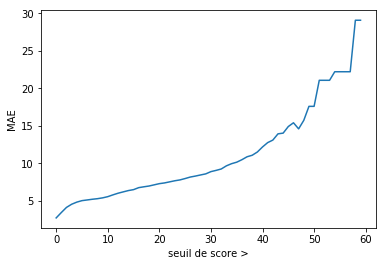

In [24]:
plt.plot(gap, mae)
plt.xlabel("seuil de score >")
plt.ylabel("MAE")
plt.show()

In [25]:
mean_absolute_error(temp.prediction, temp.score)

2.6792687958510446

### Répartition des erreurs

In [26]:
temp["ecart"] = abs(temp.prediction - temp.score)

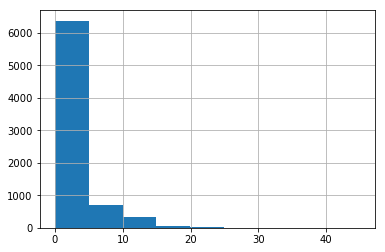

In [27]:
temp["ecart"].hist(bins=9)
plt.show()

### R2

In [28]:
r2_score(temp.prediction, temp.score)

0.76832008709498634

## Etude des ballotages 

In [29]:
def qualif(x):
    if x > 50:
        return "E"
    if x > 12.5:
        return "0"
    else: 
        return "N"
    
temp["qualif_true"] = temp["score"].map(lambda x : qualif(x))
temp["qualif_pred"] = temp["prediction"].map(lambda x : qualif(x))

In [30]:
temp[(temp["code"]=="56|4") | (temp["code"]=="75|1") | (temp["code"]=="80|5") | (temp["code"]=="972|3") | (temp["code"]=="986|1") ]

,depart,code,circo,nom,parti,score,prenom,code_dep,prediction,ecart,qualif_true,qualif_pred
3417,morbihan,56|4,4,MOLAC,En marche !,54.00,PAUL,56,30.758657,23.241343,E,0
3418,morbihan,56|4,4,HERRY,Les Républicains,14.45,MARIE-HELENE,56,15.354631,0.904631,0,0
3419,morbihan,56|4,4,BUCHET,La France insoumise,12.16,CECILE,56,9.276990,2.883010,N,N
3420,morbihan,56|4,4,RICHARD,Front National,10.15,AGNES,56,10.715009,0.565009,N,N
3421,morbihan,56|4,4,LANDRIAU,Ecologiste,4.09,NATHALIE,56,7.875612,3.785612,N,N
3422,morbihan,56|4,4,CABAS,Debout la France,1.70,DAVID,56,4.622111,2.922111,N,N
3423,morbihan,56|4,4,AMISSE,Extrême gauche,1.14,JEAN-LOUIS,56,3.659675,2.519675,N,N
3424,morbihan,56|4,4,FELIX,Extrême droite,0.99,JEAN-PAUL,56,4.177894,3.187894,N,N
3425,morbihan,56|4,4,RAULT,Divers,0.67,CHRISTINE,56,1.156321,0.486321,N,N
3426,morbihan,56|4,4,HUET,Divers droite,0.62,BERNARD,56,4.527489,3.907489,N,N


In [31]:
temp.loc[3418,"qualif_true"] = "N"
temp.loc[5116,"qualif_true"] = "N"
temp.loc[7433,"qualif_true"] = "N"
temp.loc[5961,"qualif_true"] = "N"
temp.loc[7618,"qualif_true"] = "N"


In [32]:
print(classification_report(temp["qualif_true"], temp["qualif_pred"]))

             precision    recall  f1-score   support

          0       0.84      0.86      0.85      1586
          E       0.00      0.00      0.00         6
          N       0.96      0.96      0.96      5889

avg / total       0.94      0.94      0.94      7481

